In [2]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [3]:
img = cv2.imread('sIMG_8255.JPG')

In [4]:
roi = cv2.resize(img, dsize=(0, 0), fx=0.5, fy=0.5)
gray = cv2.cvtColor(roi, cv2.COLOR_BGR2GRAY)

In [5]:
gray_blur = cv2.GaussianBlur(gray, (15, 15), 3)
thresh = cv2.adaptiveThreshold(gray_blur, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV, 11, 2)
kernel = np.ones((3, 3), np.uint8)

In [6]:
closing = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, kernel, iterations = 4)
dilation = cv2.dilate(closing, kernel, iterations = 1)
cont_img = dilation.copy()
contours, hierarchy = cv2.findContours(cont_img, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

In [7]:
for cnt in contours:
    area = cv2.contourArea(cnt)
    if area < 500 or area > 4000:
        continue

    if len(cnt) < 5:
        continue

    ellipse = cv2.fitEllipse(cnt)
    cv2.ellipse(roi, ellipse, (0,255,0), 2)

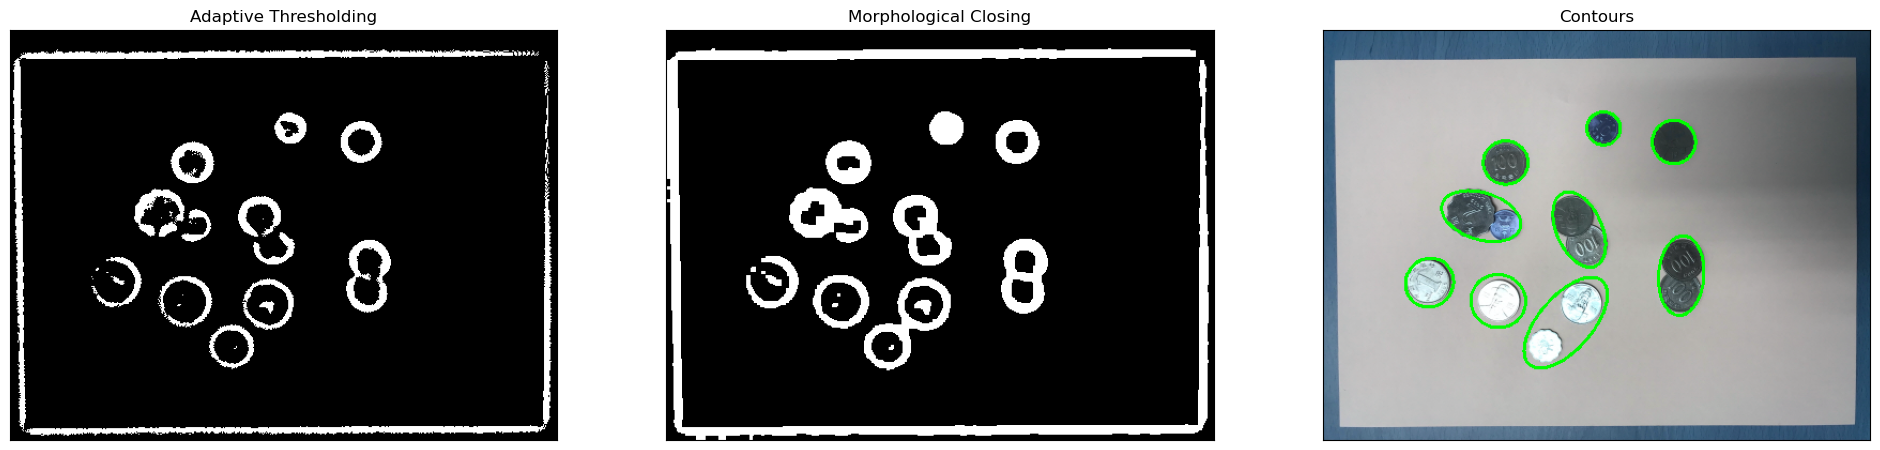

In [8]:
plt.figure(figsize=(24,8))
plt.subplot(1,3,1),plt.imshow(thresh,cmap = 'gray')
plt.title('Adaptive Thresholding'), plt.xticks([]), plt.yticks([])
plt.subplot(1,3,2),plt.imshow(dilation,cmap = 'gray')
plt.title('Morphological Closing'), plt.xticks([]), plt.yticks([])
plt.subplot(1,3,3),plt.imshow(roi)
plt.title('Contours'), plt.xticks([]), plt.yticks([])
plt.show()